# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Train
df_train = pd.read_csv("/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/training.txt", header = None)
df_train.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
print(df_train.shape)
df_train.head()

(700146, 4)


,UserID,MovieID,Rating,Timestamp
0,63,3006,4,977899676
1,1125,10,2,975625890
2,181,2384,2,977088920
3,1968,1610,4,974742431
4,4156,2410,4,965342309


In [42]:
# Test
df_test = pd.read_csv("/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/testing.txt", header = None)
df_test.columns = ['UserID', 'MovieID', 'Timestamp']
print(df_test.shape)
df_test.head()

(300063, 3)


,UserID,MovieID,Timestamp
0,324,2803,976406738
1,4447,1920,965146127
2,4238,3676,965417632
3,4661,368,963867813
4,5078,3471,962416423


In [43]:
# Movie
df_movie = pd.read_csv("/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/movies.txt", sep = '::', engine = 'python', header = None)
df_movie.columns = ['MovieID', 'Title', 'Genre']

# Split title and year
titles = []
years = []
for title_year in df_movie['Title']:
    splitted = title_year.split("(")
    title = splitted[0]
    year = splitted[-1].split(")")[0]
    titles.append(title)
    years.append(int(year))

del df_movie['Title']
df_movie.insert(len(df_movie.columns), "Title", titles)
df_movie.insert(len(df_movie.columns), "Year", years)

# One Hot encoding genre
genres_title = ["Action", "Adventure", "Animation", "Children's", "Comedy", 
                "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir",
                "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
                "Thriller", "War", "Western"]

# Add genres columns
for genre in genres_title:
    df_movie.insert(len(df_movie.columns), genre, 0)

# One hot encoding
for i in range(df_movie.shape[0]):
    movie_genre = df_movie.loc[i]['Genre'].split("|")
    for genre in movie_genre:
        if genre in genres_title:
            df_movie.at[i, genre] = 1

del df_movie['Genre']

print(df_movie.shape)
df_movie.head()

(3883, 21)


,MovieID,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# User
df_user = pd.read_csv("/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/users.txt", sep = '::', engine = 'python', header = None)
df_user.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
print(df_user.shape)
df_user.head()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# Helper Functions

In [7]:
def draw_bar_plot(column, title):
    plt.figure(figsize=(20,5))
    sns.barplot(x=column.index, y= column)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel("Frequency")

def draw_scatter_plot(col_x, col_y, dataset):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=col_x, y=col_y, data=dataset)
    plt.title("Scatter Plot: " + col_x + " - " + col_y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

# EDA

## User

In [8]:
# Columns Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
# Missing values
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [0]:
# Describe
df_user.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [10]:
# Mode
df_user.mode(axis=0)

,UserID,Gender,Age,Occupation,Zip-code
0,1,M,25.0,4.0,48104
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6035,6036,NaN,NaN,NaN,NaN
6036,6037,NaN,NaN,NaN,NaN
6037,6038,NaN,NaN,NaN,NaN
6038,6039,NaN,NaN,NaN,NaN


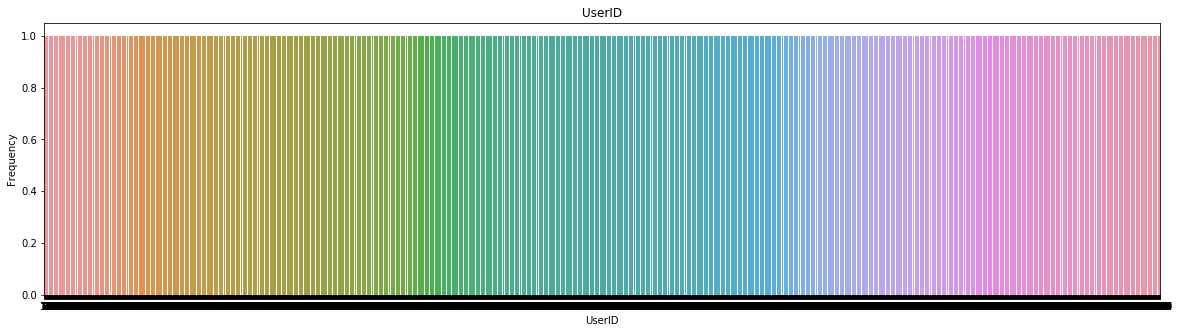

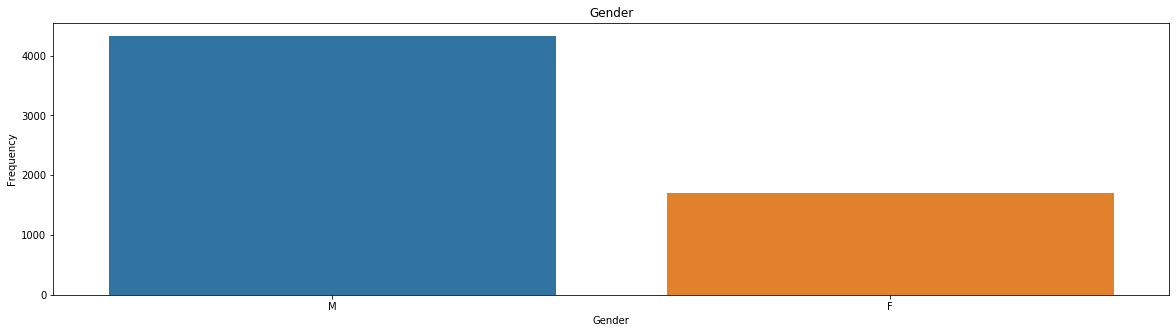

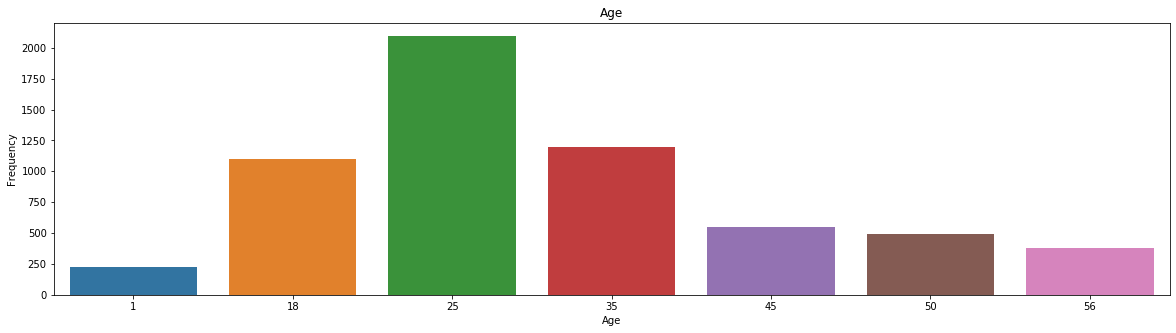

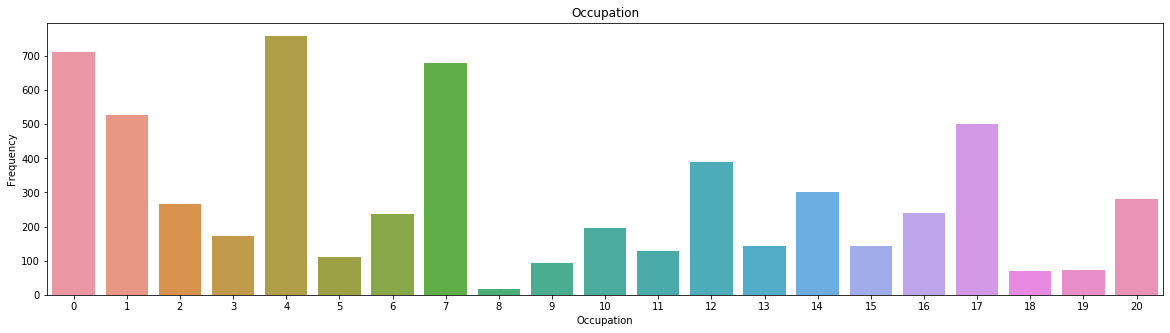

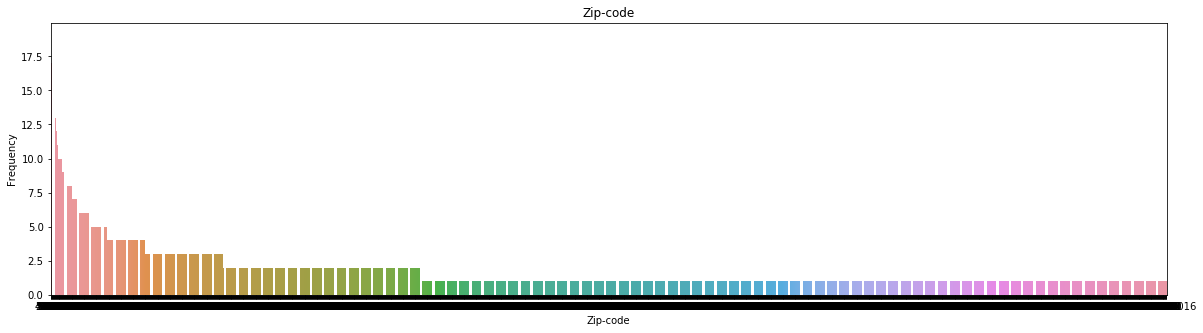

In [0]:
# Histogram
for col in df_user.columns:
    if col != 0:
        draw_bar_plot(df_user[col].value_counts(), col)

In [0]:
# Correlation
df_user.corr()

,UserID,Age,Occupation
UserID,1.000000,0.005713,-0.01812
Age,0.005713,1.000000,0.06521
Occupation,-0.018120,0.065210,1.00000


## Movies

In [0]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
MovieID        3883 non-null int64
Title          3883 non-null object
Year           3883 non-null int64
Action         3883 non-null int64
Adventure      3883 non-null int64
Animation      3883 non-null int64
Children's     3883 non-null int64
Comedy         3883 non-null int64
Crime          3883 non-null int64
Documentary    3883 non-null int64
Drama          3883 non-null int64
Fantasy        3883 non-null int64
Film-Noir      3883 non-null int64
Horror         3883 non-null int64
Musical        3883 non-null int64
Mystery        3883 non-null int64
Romance        3883 non-null int64
Sci-Fi         3883 non-null int64
Thriller       3883 non-null int64
War            3883 non-null int64
Western        3883 non-null int64
dtypes: int64(20), object(1)
memory usage: 637.2+ KB


In [0]:
# Check null
df_movie.isnull().sum()

MovieID        0
Title          0
Year           0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [0]:
# Check MovieID has duplicate
any(df_movie['MovieID'].duplicated())

In [0]:
# Check IDs that do not correspond to a movie
counter = 1;
missing_ids = []

for i in range(len(df_movie['MovieID'])):
    if(df_movie['MovieID'][i] != counter):
        missing_ids.append(df_movie['MovieID'][i]-1)
        counter += 2
    else:
        counter += 1

print(len(missing_ids))
missing_ids

69


[91,
 221,
 323,
 622,
 646,
 677,
 686,
 689,
 740,
 817,
 883,
 995,
 1048,
 1072,
 1074,
 1182,
 1195,
 1229,
 1239,
 1338,
 1403,
 1404,
 1418,
 1435,
 1452,
 1453,
 1469,
 1478,
 1481,
 1492,
 1493,
 1506,
 1507,
 1512,
 1521,
 1530,
 1536,
 1540,
 1560,
 1576,
 1607,
 1618,
 1634,
 1638,
 1639,
 1691,
 1700,
 1712,
 1737,
 1738,
 1745,
 1751,
 1761,
 1763,
 1766,
 1775,
 1778,
 1786,
 1790,
 1800,
 1803,
 1804,
 1808,
 1813,
 1818,
 1823,
 1828,
 1838,
 3815]

## Training

In [11]:
# Column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700146 entries, 0 to 700145
Data columns (total 4 columns):
UserID       700146 non-null int64
MovieID      700146 non-null int64
Rating       700146 non-null int64
Timestamp    700146 non-null int64
dtypes: int64(4)
memory usage: 21.4 MB


In [12]:
# Check null
df_train.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [45]:
# Merge df_user to df_train
train_data = df_train.merge(df_user, on='UserID')
train_data = train_data.merge(df_movie, on='MovieID')

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700146 entries, 0 to 700145
Data columns (total 28 columns):
UserID         700146 non-null int64
MovieID        700146 non-null int64
Rating         700146 non-null int64
Timestamp      700146 non-null int64
Gender         700146 non-null object
Age            700146 non-null int64
Occupation     700146 non-null int64
Zip-code       700146 non-null object
Title          700146 non-null object
Year           700146 non-null int64
Action         700146 non-null int64
Adventure      700146 non-null int64
Animation      700146 non-null int64
Children's     700146 non-null int64
Comedy         700146 non-null int64
Crime          700146 non-null int64
Documentary    700146 non-null int64
Drama          700146 non-null int64
Fantasy        700146 non-null int64
Film-Noir      700146 non-null int64
Horror         700146 non-null int64
Musical        700146 non-null int64
Mystery        700146 non-null int64
Romance        700146 non-null int6

In [14]:
# describe
train_data.describe()

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Year,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,700146.000000,700146.000000,700146.000000,7.001460e+05,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,...,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000,700146.000000
mean,3024.503631,1866.332863,3.582868,9.722454e+08,29.739577,8.035944,1986.695024,0.257363,0.133868,0.043224,...,0.036308,0.018258,0.076177,0.041438,0.040109,0.147502,0.157311,0.189550,0.068569,0.020580
std,1728.452054,1096.285466,1.116531,1.215109e+07,11.752087,6.531375,14.349343,0.437182,0.340510,0.203361,...,0.187056,0.133882,0.265281,0.199302,0.196214,0.354606,0.364094,0.391946,0.252719,0.141974
min,1.000000,1.000000,1.000000,9.567039e+08,1.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1506.000000,1030.000000,3.000000,9.653027e+08,25.000000,2.000000,1982.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3070.000000,1835.000000,4.000000,9.729905e+08,25.000000,7.000000,1992.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4476.000000,2770.000000,4.000000,9.752210e+08,35.000000,14.000000,1997.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6040.000000,3952.000000,5.000000,1.046455e+09,56.000000,20.000000,2000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Mode
train_data.mode()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Year,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4169.0,2858.0,4.0,975528115,M,25.0,4.0,94110,American Beauty,1999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,1025585635,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Skew
train_data.skew()

UserID          0.005749
MovieID         0.091948
Rating         -0.553593
Timestamp       2.761437
Age             0.398471
Occupation      0.404403
Year           -1.757949
Action          1.110006
Adventure       2.150496
Animation       4.492287
Children's      3.301375
Comedy          0.600114
Crime           3.108812
Documentary    11.124508
Drama           0.608274
Fantasy         4.957803
Film-Noir       7.196560
Horror          3.195282
Musical         4.601681
Mystery         4.687652
Romance         1.988116
Sci-Fi          1.882421
Thriller        1.584151
War             3.414324
Western         6.753672
dtype: float64

In [17]:
# Correlation
train_data.corr()

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Year,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,1.000000,-0.017778,0.012796,-0.490570,0.034651,-0.026686,-0.031362,-0.003256,-0.002239,-0.007662,...,0.002508,0.004227,-0.002047,-0.001175,0.002952,0.006697,-0.003835,-0.001667,0.004676,0.005089
MovieID,-0.017778,1.000000,-0.063561,0.041818,0.026731,0.008352,-0.014484,-0.040429,-0.081792,-0.014458,...,-0.018270,-0.020686,0.057717,-0.059988,-0.029479,-0.118119,-0.011856,-0.058891,-0.082259,0.004578
Rating,0.012796,-0.063561,1.000000,-0.027008,0.055560,0.006322,-0.156016,-0.047607,-0.036957,0.019032,...,-0.023238,0.060761,-0.093796,0.016773,0.017367,0.009172,-0.043734,-0.004792,0.075530,0.007419
Timestamp,-0.490570,0.041818,-0.027008,1.000000,-0.064362,0.015904,0.027325,-0.032379,-0.023211,0.000659,...,-0.011793,-0.008453,-0.006063,-0.000241,-0.006382,-0.004515,-0.023713,-0.011322,-0.014718,-0.006264
Age,0.034651,0.026731,0.055560,-0.064362,1.000000,0.078347,-0.165408,-0.030414,-0.016802,-0.047090,...,-0.025631,0.034062,-0.024070,0.004719,0.024578,0.016219,-0.009924,-0.014760,0.037746,0.037520
Occupation,-0.026686,0.008352,0.006322,0.015904,0.078347,1.000000,-0.009674,0.018564,0.015122,-0.004012,...,0.000991,0.005241,0.000719,-0.007945,0.002064,-0.013608,0.026481,0.008833,0.009891,0.006298
Year,-0.031362,-0.014484,-0.156016,0.027325,-0.165408,-0.009674,1.000000,0.088740,-0.022568,-0.044056,...,-0.015937,-0.133030,-0.063072,-0.212176,-0.043131,0.023347,0.003135,0.101104,-0.110564,-0.073312
Action,-0.003256,-0.040429,-0.047607,-0.032379,-0.030414,0.018564,0.088740,1.000000,0.374155,-0.110071,...,0.013773,-0.080280,-0.042888,-0.100105,-0.053085,-0.066773,0.319040,0.202645,0.136585,0.022405
Adventure,-0.002239,-0.081792,-0.036957,-0.023211,-0.016802,0.015122,-0.022568,0.374155,1.000000,0.004471,...,0.225089,-0.015484,-0.057251,-0.020665,-0.043573,-0.023834,0.284619,-0.037745,0.017299,-0.011903
Animation,-0.007662,-0.014458,0.019032,0.000659,-0.047090,-0.004012,-0.044056,-0.110071,0.004471,1.000000,...,0.011197,0.034858,-0.049676,0.335833,-0.042481,-0.054286,-0.054855,-0.085177,-0.046025,-0.030810


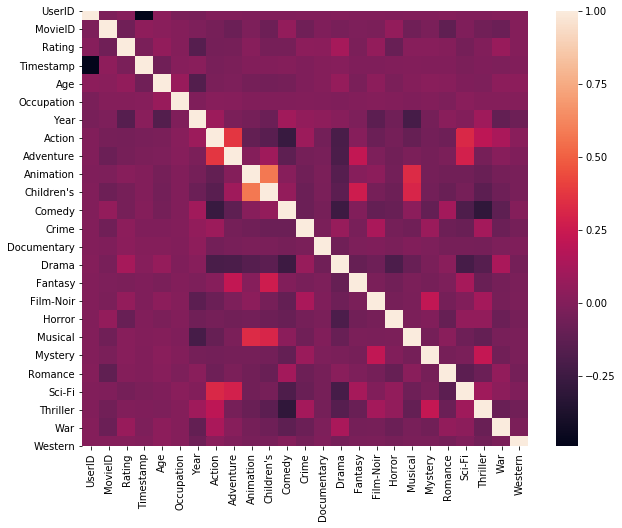

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr())

# Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# Label encoding
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])

train_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Year,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,63,3006,4,977899676,1,18,4,54902,1663,1999,...,0,0,0,0,0,0,0,0,0,0
1,5283,3006,5,961095530,1,18,2,63138,1663,1999,...,0,0,0,0,0,0,0,0,0,0
2,5433,3006,3,960047059,0,35,17,45014,1663,1999,...,0,0,0,0,0,0,0,0,0,0
3,192,3006,3,977024497,1,18,1,10977,1663,1999,...,0,0,0,0,0,0,0,0,0,0
4,1532,3006,5,974824473,1,18,14,43613,1663,1999,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_data.corr()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Title,Year,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,1.000000,-0.017778,0.012796,-0.490570,-0.035073,0.034651,-0.026686,-0.000706,-0.031362,-0.003256,...,0.002508,0.004227,-0.002047,-0.001175,0.002952,0.006697,-0.003835,-0.001667,0.004676,0.005089
MovieID,-0.017778,1.000000,-0.063561,0.041818,0.021098,0.026731,0.008352,-0.015064,-0.014484,-0.040429,...,-0.018270,-0.020686,0.057717,-0.059988,-0.029479,-0.118119,-0.011856,-0.058891,-0.082259,0.004578
Rating,0.012796,-0.063561,1.000000,-0.027008,-0.019665,0.055560,0.006322,0.012982,-0.156016,-0.047607,...,-0.023238,0.060761,-0.093796,0.016773,0.017367,0.009172,-0.043734,-0.004792,0.075530,0.007419
Timestamp,-0.490570,0.041818,-0.027008,1.000000,-0.009043,-0.064362,0.015904,-0.002318,0.027325,-0.032379,...,-0.011793,-0.008453,-0.006063,-0.000241,-0.006382,-0.004515,-0.023713,-0.011322,-0.014718,-0.006264
Gender,-0.035073,0.021098,-0.019665,-0.009043,1.000000,-0.003192,0.114991,0.000982,-0.001923,0.094884,...,0.002805,0.006536,0.035445,-0.039322,-0.000759,-0.091450,0.072664,0.038633,0.025525,0.025113
Age,0.034651,0.026731,0.055560,-0.064362,-0.003192,1.000000,0.078347,-0.009598,-0.165408,-0.030414,...,-0.025631,0.034062,-0.024070,0.004719,0.024578,0.016219,-0.009924,-0.014760,0.037746,0.037520
Occupation,-0.026686,0.008352,0.006322,0.015904,0.114991,0.078347,1.000000,-0.000018,-0.009674,0.018564,...,0.000991,0.005241,0.000719,-0.007945,0.002064,-0.013608,0.026481,0.008833,0.009891,0.006298
Title,-0.000706,-0.015064,0.012982,-0.002318,0.000982,-0.009598,-0.000018,1.000000,0.024270,0.084836,...,0.042298,-0.017839,-0.046772,0.017118,-0.031621,0.059442,0.049932,0.016262,-0.010471,0.009040
Year,-0.031362,-0.014484,-0.156016,0.027325,-0.001923,-0.165408,-0.009674,0.024270,1.000000,0.088740,...,-0.015937,-0.133030,-0.063072,-0.212176,-0.043131,0.023347,0.003135,0.101104,-0.110564,-0.073312
Action,-0.003256,-0.040429,-0.047607,-0.032379,0.094884,-0.030414,0.018564,0.084836,0.088740,1.000000,...,0.013773,-0.080280,-0.042888,-0.100105,-0.053085,-0.066773,0.319040,0.202645,0.136585,0.022405


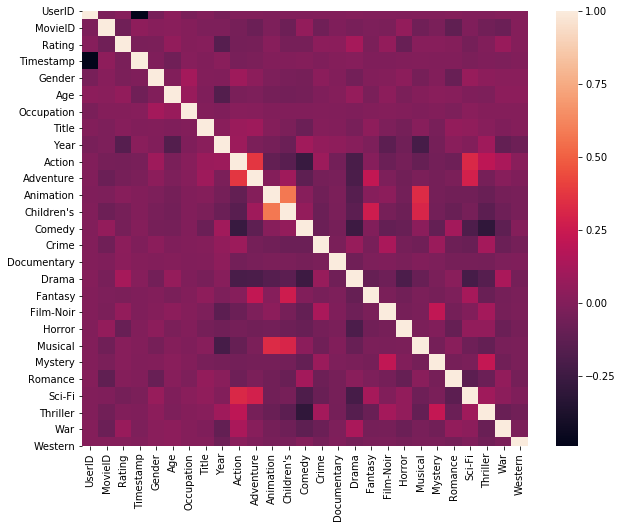

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr())

In [0]:
for genre in genres_title:
    rated5 = 0
    rated4 = 0
    rated3 = 0
    rated2 = 0
    rated1 = 0
    for i in range(len(train_data)):
        if(train_data[genre][i] == 1):
            if(train_data['Rating'][i] == 1):
                rated1 += 1
            elif(train_data['Rating'][i] == 2):
                rated2 += 1
            elif(train_data['Rating'][i] == 3):
                rated3 += 1
            elif(train_data['Rating'][i] == 4):
                rated4 += 1
            elif(train_data['Rating'][i] == 5):
                rated5 += 1
    print(genre)
    print("Rated 1 : " + str(rated1))
    print("Rated 2 : " + str(rated2))
    print("Rated 3 : " + str(rated3))
    print("Rated 4 : " + str(rated4))
    print("Rated 5 : " + str(rated5))
    print("=========================")

Action
Rated 1 : 11530
Rated 2 : 21926
Rated 3 : 49617
Rated 4 : 60494
Rated 5 : 36625
Adventure
Rated 1 : 5914
Rated 2 : 11620
Rated 3 : 26594
Rated 4 : 30957
Rated 5 : 18642
Animation
Rated 1 : 1476
Rated 2 : 2475
Rated 3 : 7701
Rated 4 : 11130
Rated 5 : 7481
Children's
Rated 1 : 4107
Rated 2 : 6036
Rated 3 : 14396
Rated 4 : 16579
Rated 5 : 9540
Comedy
Rated 1 : 15098
Rated 2 : 28597
Rated 3 : 67789
Rated 4 : 86468
Rated 5 : 51511
Crime
Rated 1 : 2244
Rated 2 : 5168
Rated 3 : 13704
Rated 4 : 19908
Rated 5 : 14639
Documentary
Rated 1 : 188
Rated 2 : 328
Rated 3 : 1024
Rated 4 : 2102
Rated 5 : 1882
Drama
Rated 1 : 8473
Rated 2 : 20437
Rated 3 : 59475
Rated 4 : 92120
Rated 5 : 67705
Fantasy
Rated 1 : 1610
Rated 2 : 3340
Rated 3 : 7384
Rated 4 : 8195
Rated 5 : 4892
Film-Noir
Rated 1 : 193
Rated 2 : 570
Rated 3 : 2218
Rated 4 : 4838
Rated 5 : 4964
Horror
Rated 1 : 6199
Rated 2 : 8321
Rated 3 : 14994
Rated 4 : 15287
Rated 5 : 8534
Musical
Rated 1 : 1430
Rated 2 : 2605
Rated 3 : 7367
Rated 

In [59]:
ratings = train_data['Rating']
del train_data['Rating']
train_data.insert(len(train_data.columns), "rating", ratings)
train_data.head()

,UserID,MovieID,Timestamp,Gender,Age,Occupation,Zip-code,Title,Year,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,63,3006,977899676,M,18,4,54902,"Insider, The",1999,0,...,0,0,0,0,0,0,0,0,0,4
1,5283,3006,961095530,M,18,2,63138,"Insider, The",1999,0,...,0,0,0,0,0,0,0,0,0,5
2,5433,3006,960047059,F,35,17,45014,"Insider, The",1999,0,...,0,0,0,0,0,0,0,0,0,3
3,192,3006,977024497,M,18,1,10977,"Insider, The",1999,0,...,0,0,0,0,0,0,0,0,0,3
4,1532,3006,974824473,M,18,14,43613,"Insider, The",1999,0,...,0,0,0,0,0,0,0,0,0,5


In [60]:
# Split X & y (feature selection)
y = train_data['rating']
# X = train_data[['Year', 'Title']]
X = train_data.loc[:, ~train_data.columns.isin(["UserID", "MovieID", "Timestamp", "Gender", "Age", "Occupation", "Zip-code"])]
X.head()

,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,"Insider, The",1999,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1,"Insider, The",1999,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,"Insider, The",1999,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
3,"Insider, The",1999,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,"Insider, The",1999,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5


# Model

## Surprise

In [ ]:
pip install scikit-surprise

In [0]:
# Algorithms
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NormalPredictor
from surprise import CoClustering
from surprise import SlopeOne
from surprise import NMF

from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [0]:
# read dataset from pandas DF
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_train[['UserID', 'MovieID', 'Rating']], reader)

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

algo = SVDpp()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8834


0.883413117607756

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

algo2 = SVDpp(n_factors=10)
algo2.fit(trainset)
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.8780


0.877951340750974

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

algo3 = SVDpp()
algo3.fit(trainset)
predictions3 = algo3.test(testset)
accuracy.rmse(predictions3)

RMSE: 0.8874


0.8874134632058369

In [0]:
preds = []

for i in range(df_test.shape[0]):
    pred = algo.predict(uid=df_test['UserID'][i], iid=df_test['MovieID'][i])
    preds.append(pred.est)

In [0]:
df_csv = pd.DataFrame(preds, columns=['Predicted'])
df_csv.index += 1
df_csv.to_csv('/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/submission3.csv', index=True, index_label="ID")

## Sklearn

In [0]:
from sklearn.model_selection import train_test_split

# Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
# Split train-test from training.txt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_train.head()

,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
34005,1304,1984,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27053,3246,1998,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
688343,1232,1994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
564409,383,1996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
471166,1137,1997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
# Random Forest
clf_rf = RandomForestClassifier(n_estimators=25)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("RMSE : " + str(sqrt(mean_squared_error(y_test, y_pred_rf))))

RMSE : 1.1001519217804019


In [0]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
print("RMSE : " + str(sqrt(mean_squared_error(y_test, y_pred_dt))))

RMSE : 1.098417057142613


In [0]:
# MLP
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)
print("RMSE : " + str(sqrt(mean_squared_error(y_test, y_pred_mlp))))

RMSE : 1.1937792531429723


In [0]:
# KNN
clf_knn = KNeighborsClassifier(n_neighbors=50)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print("RMSE : " + str(sqrt(mean_squared_error(y_test, y_pred_knn))))

RMSE : 1.1224405928074404


# Predict Test

In [0]:
df_test.head()

,UserID,MovieID,Timestamp
0,324,2803,976406738
1,4447,1920,965146127
2,4238,3676,965417632
3,4661,368,963867813
4,5078,3471,962416423


In [0]:
# Prepare test data
test_data = df_test.copy()
test_data = df_test.merge(df_user, on='UserID')
test_data = test_data.merge(df_movie, on='MovieID')
test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])
test_data['Title'] = label_encoder.fit_transform(test_data['Title'])

test_X = test_data.loc[:, ~test_data.columns.isin(["UserID", "MovieID", "Timestamp", "Gender", "Age", "Occupation", "Zip-code"])]

test_X.head()

,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2387,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2387,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2387,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2387,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2387,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# Predict
y_pred_test = clf_rf.predict(test_X)
y_pred_test.astype('float64')

array([4., 4., 4., ..., 5., 4., 4.])

In [0]:
# Write to CSV
df_csv = pd.DataFrame(y_pred_test.astype('float64'), columns=['Predicted'])
df_csv.index += 1
df_csv.to_csv('/content/drive/My Drive/ITB/Kuliah_Tugas/IF4041 - Ilmu Data dan Penggalian Data/Tugas Besar 3/submission.csv', index=True, index_label="ID")